Look back if not sure (about the exp setting): hyp.yaml and opt.yaml

sound results:
- 191. The baseline. fine tune 5 and fl (1.5/0.75). 450 epoch (NOT THE BASE)
- 192. The pretrain baseline 150, then cyolo 300. fine tune 5 and fl (1.5/0.75). 
- 

Plotting for 191 

In [205]:
import os
import pandas as pd
import json
import yaml
from utils.plots import plot_images
from utils.datasets import create_dataloader
from train_with_bcc import get_file_volunteers_dict
from train_with_bcc import VOL_ID_MAP as vol_id_map

from IPython.display import Image
from itertools import product


import numpy as np
import torch

from shutil import copyfile, rmtree
from pathlib import Path


In [206]:
# rel_path = os.path.join(os.curdir, 'runs', 'train')
rel_path = os.path.join('/Users/gs0029/onedrive/University of Surrey/Yin, Camellia (PG R - Computer Science) - runs', 'train')

In [207]:
def read_exp_results(exp_no, exp_prefix='exp'):
    exp_prefix = 'exp'
    exp_name = f'{exp_prefix}{exp_no}'
    exp_path = os.path.join(rel_path, exp_name)
    res_file_name = os.path.join(exp_path, 'results.csv')
    results_df = pd.read_csv(res_file_name)
    pred = json.load(open(os.path.join(exp_path, '_predictions.json'))) #todo
    hyp = yaml.safe_load(open(os.path.join(exp_path, 'hyp.yaml'))) #todo
    opt = yaml.safe_load(open(os.path.join(exp_path, 'opt.yaml'))) #todo
    cm_path = os.path.join(exp_path, '_confusion_matrix_abs.png')
    cm = plt.imread(cm_path)
    return {'results': results_df, 'hyp': hyp, 'opt': opt, 'pred': pred, 'cm': cm}

def get_im_vol_list(target_volunteers, num_images):
    im_vol_list = []
    for i in range(num_images):
        x = target_volunteers[target_volunteers[:,0] == i, -1].int().detach().numpy()
        num_boxes = x.shape[0]
        vol_per_im = []
        for j in range(num_boxes):
            vol_per_im.append(x[j])
        im_vol_list.append(vol_per_im)
    return im_vol_list

In [208]:
img_info_map = {'imgs': None,
                'volunteer_labels': None,
                'expert_labels': None,
                'yolo_labels': None,
                'cyolo_labels': None}

In [14]:
# yolo_exp_id = 194
# yolo_results = read_exp_results(yolo_exp_id)
# yolo_results, yolo_hyp, yolo_opt, yolo_pred = [yolo_results[x] for x in ['results', 'hyp', 'opt', 'pred']]

# cyolo_exp_id = 196
# cyolo_results = read_exp_results(cyolo_exp_id)
# cyolo_results, cyolo_hyp, cyolo_opt, cyolo_pred = [cyolo_results[x] for x in ['results', 'hyp', 'opt', 'pred']]

In [15]:
# data_dict = yaml.safe_load(open(cyolo_opt['data']))
# val_path = os.path.join(data_dict['path'], data_dict['val'])
# imgsz = cyolo_opt['imgsz']
# batch_size = 20

In [16]:
# volunteers_loader, volunteers_dataset = create_dataloader(val_path, imgsz, batch_size, 32, hyp=cyolo_hyp, augment=False)
# file_volunteers_dict = get_file_volunteers_dict(data_dict, mode='val', vol_id_map = vol_id_map)

# temp_data_name = 'temp'
# data_home, data_name = data_dict['path'].split('/')
# user = 'Jonathan'

# temp_dir = os.path.join(data_home, temp_data_name)
# temp_la_dir = os.path.join(temp_dir, 'labels')
# temp_im_dir = os.path.join(temp_dir, 'images')
# Path(temp_la_dir).mkdir(parents=True, exist_ok=True)
# Path(temp_im_dir).mkdir(parents=True, exist_ok=True)

# for f in volunteers_dataset.label_files:
#     la_name = f.split(os.sep)[-1]
#     im_name = la_name.split('.')[0]+'.jpg'
#     la_path = os.path.join(data_home, 'master', 'labels', user, la_name)
#     im_path = os.path.join(data_home, 'master', 'images', im_name)
#     temp_la_path = os.path.join(temp_la_dir, la_name)
#     temp_im_path = os.path.join(temp_im_dir, im_name)
# #     h, w, _ = cv2.imread('data/src/lena.jpg').shape
#     copyfile(la_path, temp_la_path)
#     copyfile(im_path, temp_im_path)

# expert_loader, expert_dataset = create_dataloader(temp_im_dir, imgsz, batch_size, 32, hyp=cyolo_hyp, augment=False)

# for i, (vol, exp) in enumerate(zip(volunteers_loader, expert_loader)):
#     imgs, vol_targets, _, _ = vol
#     _, exp_targets, _, _ = exp
#     img_info_map['imgs'] = imgs
#     img_info_map['volunteer_labels'] = vol_targets
#     img_info_map['expert_labels'] = exp_targets
#     break

In [17]:
# rmtree(temp_dir)

In [18]:
# im_id_map = {x.split(os.sep)[-1].split('.')[0]: i for i, x in enumerate(volunteers_dataset.label_files)}

In [19]:
# im_wh_map = {x.split(os.sep)[-1].split('.')[0]: wh for i, (x, wh) in enumerate(zip(volunteers_dataset.label_files, volunteers_dataset.shapes))}

In [20]:
# def create_targets(x):
#     im_name = x['image_id'].split('.')[0]
#     im_id = im_id_map[im_name]
#     cat_id = x['category_id']
#     score = x['score']
#     bb_x, bb_y, bb_w, bb_h = x['bbox']
#     w, h = im_wh_map[im_name]
#     normalized_bbox = [bb_x*1.0/w, bb_y*1.0/h, bb_w*1.0/w, bb_h*1.0/h]
#     target = [im_id, cat_id] + normalized_bbox + [score]
#     return target

# conf_thres = 0.25
# df_pred = pd.DataFrame(yolo_pred)
# df_pred = df_pred[df_pred['score'] > conf_thres]
# pred_targets = torch.tensor(list(df_pred.apply(create_targets, axis=1)))
# img_info_map['yolo_labels'] = pred_targets

# df_pred = pd.DataFrame(cyolo_pred)
# df_pred = df_pred[df_pred['score'] > conf_thres]
# pred_targets = torch.tensor(list(df_pred.apply(create_targets, axis=1)))
# img_info_map['cyolo_labels'] = pred_targets

## Volunteer labels

In [21]:
# num_cl = 2
# num_vol = 4
# class_name = {0: 'BL', 1: 'DC'}

# batch_filenames = [volunteers_dataset.label_files[x].split(os.sep)[-1] for x in np.where(volunteers_dataset.batch==i)[0]]
# batch_volunteers_list = [file_volunteers_dict[fn] for fn in batch_filenames]
# batch_volunteers = torch.cat(batch_volunteers_list)
# target_volunteers = torch.cat([img_info_map['volunteer_labels'], batch_volunteers.unsqueeze(-1)], axis=1)
# im_vol_list = get_im_vol_list(target_volunteers, imgs.shape[0])
# plot_images(imgs, img_info_map['volunteer_labels'], names = ['BL', 'DC'], volunteers = im_vol_list)
# pil_img = Image(filename='images.jpg')
# display(pil_img)

## Expert labels (Jonathan)

In [22]:
# num_cl = 2
# num_vol = 4
# class_name = {0: 'BL', 1: 'DC'}

# plot_images(imgs, img_info_map['expert_labels'], names = ['BL', 'DC'])
# pil_img = Image(filename='images.jpg')
# display(pil_img)

## YOLO labels (TODO: fix the boxes -- normalize)

In [106]:
# num_cl = 2
# num_vol = 4
# class_name = {0: 'BL', 1: 'DC'}

# plot_images(imgs, img_info_map['yolo_labels'], names = ['BL', 'DC'])
# pil_img = Image(filename='images.jpg')
# display(pil_img)

In [184]:
hyps = {}
opts = {}
for e_name in os.listdir(rel_path):
    _, e = e_name[:3], e_name[3:]
    res = read_exp_results(e)
    _, hyp, opt, _ = [res[x] for x in ['results', 'hyp', 'opt', 'pred']]
    hyps[e_name] = hyp
    opts[e_name] = opt

In [185]:
FINETUNE_GAINS = {'box': 0.0296,
                 'obj': 0.301,
                 'cls': 0.243}

SCRATCH_GAINS = {'box': 0.05,
                 'obj': 1,
                 'cls': 0.5}

PW_STR_MAP = {0.1: 'lo', 1: 'n', 10: 'hi'}

def get_gain_mode(x):
    if all(x[k] == SCRATCH_GAINS[k] for k in SCRATCH_GAINS):
        gain_mode = 'scratch'
    elif all(x[k] == FINETUNE_GAINS[k] for k in FINETUNE_GAINS):
        gain_mode = 'finetune'
    else:
        gain_mode = 'custom'
    return gain_mode

def get_pw_mode(x):
    if x['cls_pw'] == 0.631 and x['obj_pw'] == 0.911:
        pw_mode = 'finetune'
    else:
        pw_mode_cls = PW_STR_MAP[x['cls_pw']]
        pw_mode_obj = PW_STR_MAP[x['obj_pw']]
        if pw_mode_cls == 'n' and pw_mode_obj == 'n':
            pw_mode = 'scratch'
        elif pw_mode_cls == 'n' and pw_mode_obj != 'n':
            pw_mode = f'O={pw_mode_obj}'
        elif pw_mode_cls != 'n' and pw_mode_obj == 'n':
            pw_mode = f'C={pw_mode_cls}'
        else:
            pw_mode = f'O={pw_mode_obj} C={pw_mode_cls}'
    return pw_mode

def get_pt_mode(x):
    if x['weights'].endswith('last.pt') or x['weights'].endswith('best.pt'):
        return True
    else:
        return False
    
hyp_df = pd.DataFrame(hyps).T
hyp_df = hyp_df[[c for c in hyp_df if hyp_df[c].nunique() > 1]]
opt_df = pd.DataFrame(opts).T
opt_df['algo'] = opt_df['bcc_epoch'].apply(lambda x: 'YOLO' if x==-1 else 'CYOLO')
df = pd.concat([opt_df[['algo', 'epochs', 'weights']], hyp_df], axis=1)
df['focal_loss'] = df['fl_gamma'] != 0
df['gain_mode'] = df.apply(get_gain_mode, axis=1)
df['pw_mode'] = df.apply(get_pw_mode, axis=1)
df['pt_mode'] = df.apply(get_pt_mode, axis=1)
df1 = df[['algo', 'epochs', 'focal_loss', 'gain_mode', 'pw_mode', 'pt_mode']]
df1

,algo,epochs,focal_loss,gain_mode,pw_mode,pt_mode
exp223,YOLO,10,False,custom,scratch,False
exp212,YOLO,50,False,custom,O=hi,False
exp215,YOLO,50,False,custom,O=hi C=lo,False
exp214,YOLO,50,False,custom,C=lo,False
exp213,YOLO,50,False,custom,O=lo,False
exp225,CYOLO,40,False,custom,scratch,True
exp222,CYOLO,50,False,custom,scratch,False
exp200,YOLO,50,True,finetune,finetune,False
exp231,YOLO,10,False,scratch,scratch,False
exp236,CYOLO,45,False,scratch,scratch,True


In [189]:
df1[df1['algo'] == 'CYOLO']

,algo,epochs,focal_loss,gain_mode,pw_mode,pt_mode
exp225,CYOLO,40,False,custom,scratch,True
exp222,CYOLO,50,False,custom,scratch,False
exp236,CYOLO,45,False,scratch,scratch,True
exp227,CYOLO,40,True,finetune,finetune,True
exp221,CYOLO,50,False,scratch,scratch,False
exp226,CYOLO,40,True,custom,scratch,True
exp232,CYOLO,40,False,scratch,scratch,True
exp233,CYOLO,40,False,custom,scratch,True
exp234,CYOLO,40,False,custom,scratch,True


In [188]:
experiments = df1[(df1['algo'] == 'YOLO') & (df1['epochs'] == 50) & (~df1['focal_loss'])].sort_values(['gain_mode', 'pw_mode'], ascending=False).index
# experiments = [x[3:] for x in experiments]
# df1

,algo,epochs,focal_loss,gain_mode,pw_mode,pt_mode
exp223,YOLO,10,False,custom,scratch,False
exp212,YOLO,50,False,custom,O=hi,False
exp215,YOLO,50,False,custom,O=hi C=lo,False
exp214,YOLO,50,False,custom,C=lo,False
exp213,YOLO,50,False,custom,O=lo,False
exp225,CYOLO,40,False,custom,scratch,True
exp222,CYOLO,50,False,custom,scratch,False
exp200,YOLO,50,True,finetune,finetune,False
exp231,YOLO,10,False,scratch,scratch,False
exp236,CYOLO,45,False,scratch,scratch,True


In [222]:
pred_df[pred_df['category_id'] == 0].sort_values('score', ascending=False)

,image_id,category_id,bbox,score
20712,Unknown-X-20200108-120416-XDI5AZK8EAY1-3.Camellia,0,"[1450.645, 1061.781, 95.697, 150.381]",0.76318
21012,Unknown-X-20200108-120416-XDI5AZK8EAY1-3.Xiongjie,0,"[1450.645, 1061.781, 95.697, 150.381]",0.76318
20412,Unknown-X-20200108-120416-XDI5AZK8EAY1-3.Conghui,0,"[1450.645, 1061.781, 95.697, 150.381]",0.76318
20112,Unknown-X-20200108-120416-XDI5AZK8EAY1-3.HaoWen,0,"[1450.645, 1061.781, 95.697, 150.381]",0.76318
3988,Unknown-X-20200221-120712-XRBESMOXZEV7-3.Conghui,0,"[1080.896, 144.582, 69.45, 122.485]",0.66162
...,...,...,...,...
21824,Unknown-X-20200224-160643-XF+8NY4TNRF-3.HaoWen,0,"[47.748, 755.744, 116.998, 103.717]",0.00100
572,IX20191030_093817_0791_000037B5.Conghui,0,"[21.785, 176.3, 51.964, 63.109]",0.00100
21653,Unknown-X-20200224-160643-XF+8NY4TNRF-3.Conghui,0,"[47.748, 755.744, 116.998, 103.717]",0.00100
1146,IX20191030_093817_0791_000037B5.Xiongjie,0,"[21.785, 176.3, 51.964, 63.109]",0.00100


In [209]:
e = 218
res = read_exp_results(e)
res_df, hyp, opt, pred, cm = [res[x] for x in ['results', 'hyp', 'opt', 'pred', 'cm']]
pred_df = pd.DataFrame(pred)
pred_df

,image_id,category_id,bbox,score
0,IX20191030_093817_0791_000037B5.Camellia,0,"[16.328, 189.876, 59.164, 70.814]",0.35791
1,IX20191030_093817_0791_000037B5.Camellia,0,"[174.282, 201.617, 62.742, 78.152]",0.34937
2,IX20191030_093817_0791_000037B5.Camellia,0,"[158.138, 169.879, 93.562, 125.116]",0.32422
3,IX20191030_093817_0791_000037B5.Camellia,0,"[7.499, 172.448, 77.074, 105.303]",0.24048
4,IX20191030_093817_0791_000037B5.Camellia,0,"[414.609, 163.642, 95.397, 145.663]",0.22375
...,...,...,...,...
21991,Unknown-X-20200224-160643-XF+8NY4TNRF-3.Xiongjie,0,"[376.291, 1083.971, 208.699, 184.667]",0.00104
21992,Unknown-X-20200224-160643-XF+8NY4TNRF-3.Xiongjie,0,"[30.989, 748.787, 121.109, 147.987]",0.00103
21993,Unknown-X-20200224-160643-XF+8NY4TNRF-3.Xiongjie,0,"[91.385, 621.671, 120.793, 216.288]",0.00103
21994,Unknown-X-20200224-160643-XF+8NY4TNRF-3.Xiongjie,0,"[1245.0, 809.5, 0.0, 83.48]",0.00102


In [219]:
data_dict

{'path': 'datasets',
 'train': 'datasets/iid-tvt/images/train',
 'val': 'datasets/iid-tvt/images/val',
 'test': 'datasets/iid-tvt/images/test',
 'nc': 2,
 'names': ['bone-loss', 'dental-caries']}

In [216]:
data_dict = yaml.safe_load(open(opt['data']))
for x in ['train', 'val', 'test']:
    if x not in data_dict:
        continue
    data_dict[x] = os.path.join(data_dict['path'], data_dict[x])

In [217]:
val_path = os.path.join(data_dict['path'], data_dict['val'])
imgsz = opt['imgsz']
batch_size = 20

In [218]:
volunteers_loader, volunteers_dataset = create_dataloader(val_path, imgsz, batch_size, 32, hyp=hyp, augment=False)
file_volunteers_dict = get_file_volunteers_dict(data_dict, mode='val', vol_id_map = vol_id_map)

for i, vol in enumerate(volunteers_loader):
    imgs, vol_targets, _, _ = vol
    img_info_map['imgs'] = imgs
    img_info_map['volunteer_labels'] = vol_targets
    break
num_cl = 2
num_vol = 4
class_name = {0: 'BL', 1: 'DC'}

batch_filenames = [volunteers_dataset.label_files[x].split(os.sep)[-1] for x in np.where(volunteers_dataset.batch==i)[0]]
batch_volunteers_list = [file_volunteers_dict[fn] for fn in batch_filenames]
batch_volunteers = torch.cat(batch_volunteers_list)
target_volunteers = torch.cat([img_info_map['volunteer_labels'], batch_volunteers.unsqueeze(-1)], axis=1)
im_vol_list = get_im_vol_list(target_volunteers, imgs.shape[0])
plot_images(imgs, img_info_map['volunteer_labels'], names = ['BL', 'DC'], volunteers = im_vol_list)
pil_img = Image(filename='images.jpg')
display(pil_img)

Exception: Error loading data from datasets/datasets/iid-tvt/images/val: datasets/datasets/iid-tvt/images/val does not exist
See https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data

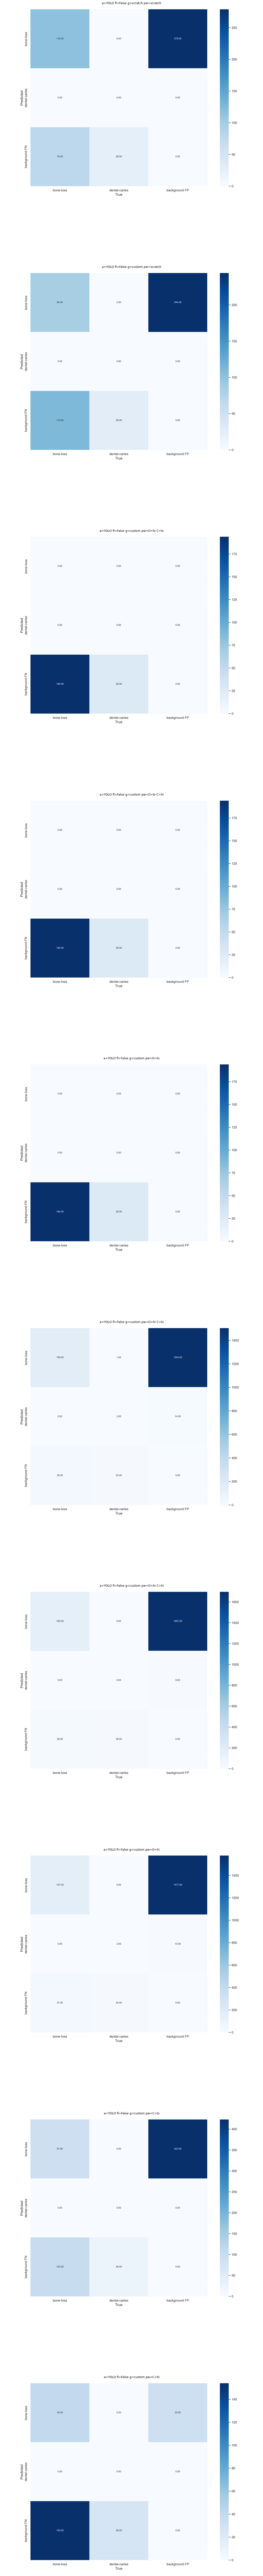

In [174]:
fig, axs = plt.subplots(len(experiments), 1, figsize=(15, 15*len(experiments)))

for i, e in enumerate(experiments):
    res = read_exp_results(e)
    res, hyp, opt, pred, cm = [res[x] for x in ['results', 'hyp', 'opt', 'pred', 'cm']]
    res.columns = [x.strip() for x in res.columns]
    res['train_loss'] = res[['train/box_loss', 'train/cls_loss', 'train/cls_loss']].sum(axis=1)
    res['val_loss'] = res[['val/box_loss', 'val/cls_loss', 'val/cls_loss']].sum(axis=1)
    ax = axs[i]
    ax.imshow(cm)
    _ = ax.axis('off')
    algo, fl, g, pw = [df1.loc[f'exp{e}', x] for x in ['algo', 'focal_loss', 'gain_mode', 'pw_mode']]
    ax.set_title(f'{e} (a={algo} fl={fl} g={g} pw={pw})')
plt.tight_layout()

In [ ]:
fig, axs = plt.subplots(len(experiments), 1, figsize=(15, 15*len(experiments)))

for i, e in enumerate(experiments):
    res = read_exp_results(e)
    res, hyp, opt, pred = [res[x] for x in ['results', 'hyp', 'opt', 'pred']]
    res.columns = [x.strip() for x in res.columns]
    res['train_loss'] = res[['train/box_loss', 'train/cls_loss', 'train/cls_loss']].sum(axis=1)
    res['val_loss'] = res[['val/box_loss', 'val/cls_loss', 'val/cls_loss']].sum(axis=1)
    ax = axs[i]
    ax.imshow(cm)
    _ = ax.axis('off')
#     ax.set_title(f"{e} (${hyp['box']}\\cdot l_{{box}} + {hyp['obj']}\\cdot l_{{obj}} + {hyp['cls']}\\cdot l_{{cls}}$)" + equations)
    algo, fl, g, pw = [df1.loc[f'exp{e}', x] for x in ['algo', 'focal_loss', 'gain_mode', 'pw_mode']]
    ax.set_title(f'{e} (a={algo} fl={fl} g={g} pw={pw})')
#     ax.set_xlabel('epochs')
#     ax.set_ylabel('total_loss')
#     ax.plot(res['epoch'], res['train_loss'], label='train')
#     ax.plot(res['epoch'], res['val_loss'], label='val')
#     ax.grid()
#     ax.legend()
    
#     losses = ['box', 'obj', 'cls']
#     for j, l in enumerate(losses):
#         ax = axs[i][j+1]
#         ax.set_title(f'{l}_loss\n a={algo} fl={fl} g={g} pw={pw}')
#         ax.set_xlabel('epochs')
#         ax.set_ylabel('loss')
#         ax.plot(res['epoch'], res[f'train/{l}_loss'], label=f'train')
#         ax.plot(res['epoch'], res[f'val/{l}_loss'], label='val')
#         ax.grid()
#         ax.legend()
    
#     metrics = ['precision', 'recall', 'mAP_0.5', 'mAP_0.5:0.95']
#     for j, m in enumerate(metrics):
#         ax = axs[i][j+4]
#         ax.set_title(f'{e} ({m})')
#         ax.set_xlabel('epochs')
#         ax.set_ylabel(m)
#         ax.plot(res['epoch'], res[f'metrics/{m}'], label=f'{m}')
#         ax.grid()
#         ax.legend()
plt.tight_layout()

In [125]:
gain_modes = ['scratch', 'finetune', 'custom']
pw_modes = ['scratch', 'finetune']

for e_name in os.listdir(rel_path):
    _, e = e_name[:3], e_name[3:]
    res = read_exp_results(e)
    results, hyp, opt, pred = [res[x] for x in ['results', 'hyp', 'opt', 'pred']]

In [9]:
experiments = {'YOLO-300': 151,
               'YOLO-450': 194,
               'YOLO-150': 195,
               'YOLO-50': 200,
               'YOLO-lg-50': 208,
               'YOLO-lg-pw-50': 210,
               'CYOLO-300': 197,
               'CYOLO-pt150-300': [195, 196],
               'CYOLO-pt450-450': [194, 198],
               'CYOLO-ptb150-300': [195, 199]
              }

exp_names = ['YOLO-50', 'YOLO-lg-50', 'YOLO-lg-pw-50']
results = {e: read_exp_results(experiments[e]) for e in exp_names}
# yolo_results, yolo_hyp, yolo_opt, yolo_pred = [yolo_results[x] for x in ['results', 'hyp', 'opt', 'pred']]

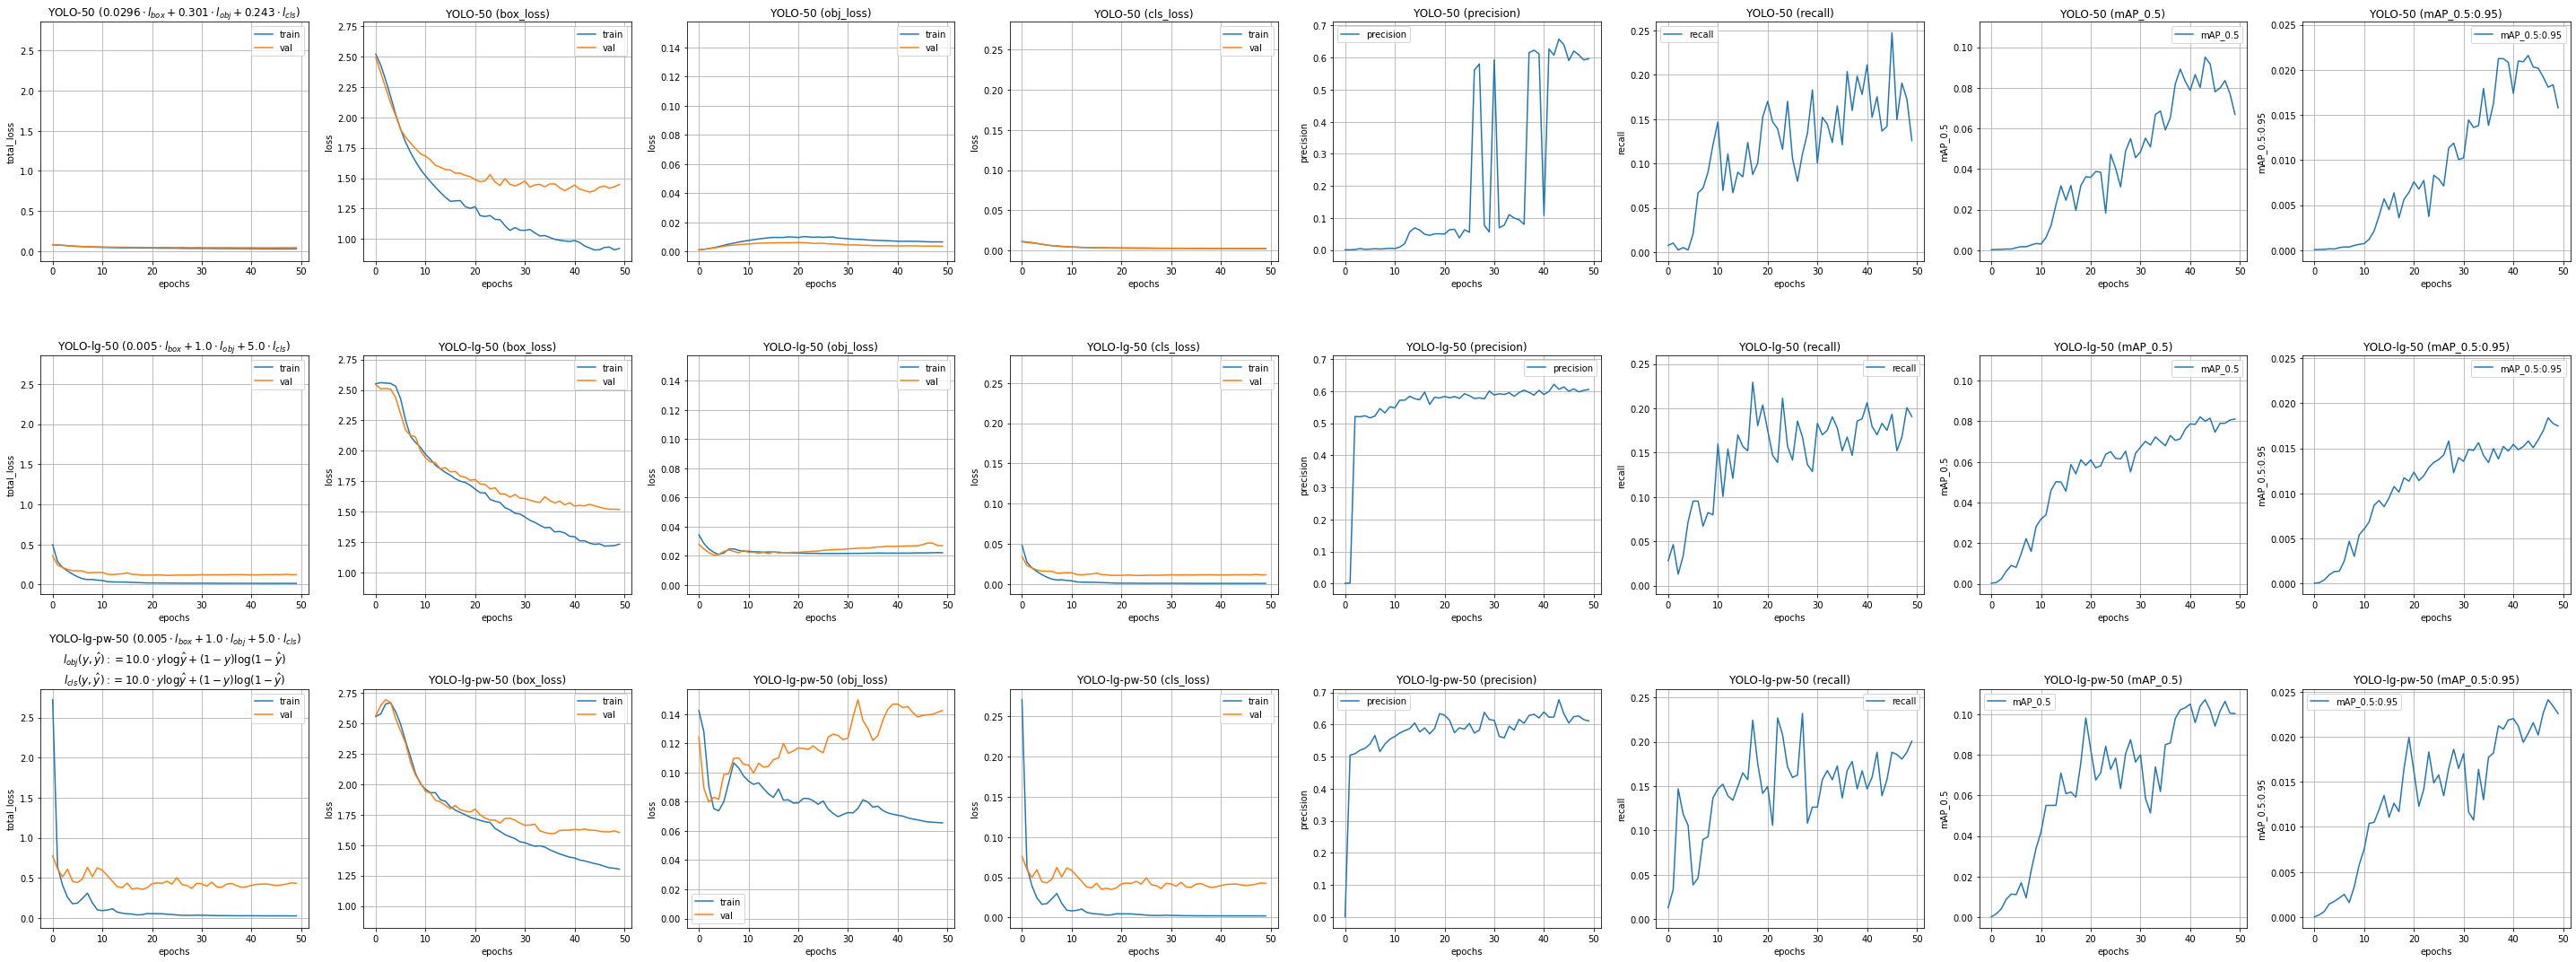

In [280]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
fig, axs = plt.subplots(len(exp_names), 8, figsize=(5*8, 5*len(exp_names)), sharey='col')

for i, e in enumerate(exp_names):
    res, hyp, opt, pred = [results[e][x] for x in ['results', 'hyp', 'opt', 'pred']]
    if 'pw' in e:
        equations = f"\n$l_{{obj}}(y, \\hat{{y}}) := {hyp['obj_pw']}\\cdot y\\log\\hat{{y}} + (1-y)\\log(1-\\hat{{y}})$"
        equations += f"\n$l_{{cls}}(y, \\hat{{y}}) := {hyp['cls_pw']}\\cdot y\\log\\hat{{y}} + (1-y)\\log(1-\\hat{{y}})$"
    else:
        equations = ""
    res.columns = [x.strip() for x in res.columns]
    res['train_loss'] = res[['train/box_loss', 'train/cls_loss', 'train/cls_loss']].sum(axis=1)
    res['val_loss'] = res[['val/box_loss', 'val/cls_loss', 'val/cls_loss']].sum(axis=1)
    ax = axs[i][0]
    ax.set_title(f"{e} (${hyp['box']}\\cdot l_{{box}} + {hyp['obj']}\\cdot l_{{obj}} + {hyp['cls']}\\cdot l_{{cls}}$)" + equations)
    ax.set_xlabel('epochs')
    ax.set_ylabel('total_loss')
    ax.plot(res['epoch'], res['train_loss'], label='train')
    ax.plot(res['epoch'], res['val_loss'], label='val')
    ax.grid()
    ax.legend()
    
    losses = ['box', 'obj', 'cls']
    for j, l in enumerate(losses):
        ax = axs[i][j+1]
        ax.set_title(f'{e} ({l}_loss)')
        ax.set_xlabel('epochs')
        ax.set_ylabel('loss')
        ax.plot(res['epoch'], res[f'train/{l}_loss']/hyp[l], label=f'train')
        ax.plot(res['epoch'], res[f'val/{l}_loss']/hyp[l], label='val')
        ax.grid()
        ax.legend()
    
    metrics = ['precision', 'recall', 'mAP_0.5', 'mAP_0.5:0.95']
    for j, m in enumerate(metrics):
        ax = axs[i][j+4]
        ax.set_title(f'{e} ({m})')
        ax.set_xlabel('epochs')
        ax.set_ylabel(m)
        ax.plot(res['epoch'], res[f'metrics/{m}'], label=f'{m}')
        ax.grid()
        ax.legend()
    
plt.tight_layout()

In [210]:
res.columns

Index(['epoch', 'train/box_loss', 'train/obj_loss', 'train/cls_loss',
       'metrics/precision', 'metrics/recall', 'metrics/mAP_0.5',
       'metrics/mAP_0.5:0.95', 'val/box_loss', 'val/obj_loss', 'val/cls_loss',
       'x/lr0', 'x/lr1', 'x/lr2', 'train_loss', 'val_loss'],
      dtype='object')

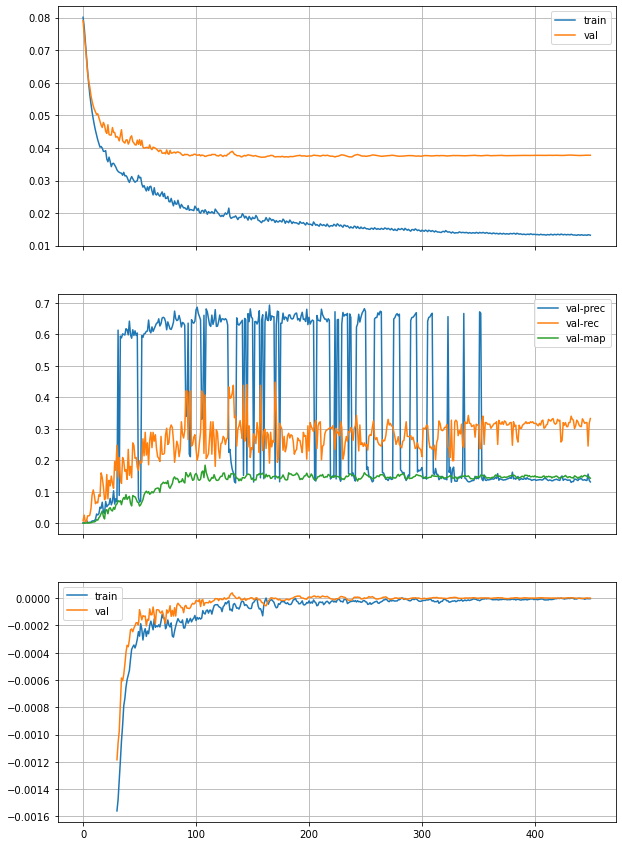

In [214]:



ax = axs[1]
ax.plot(yolo_results['epoch'], yolo_results['metrics/precision'], label='val-prec')
ax.plot(yolo_results['epoch'], yolo_results['metrics/recall'], label='val-rec')
ax.plot(yolo_results['epoch'], yolo_results['metrics/mAP_0.5'], label='val-map')
ax.grid()
ax.legend()

ax = axs[2]
ax.plot(yolo_results['epoch'], yolo_results['train_loss'].diff().rolling(30).mean(), label='train')
ax.plot(yolo_results['epoch'], yolo_results['val_loss'].diff().rolling(30).mean(), label='val')
ax.grid()
# ax.set_ylim(-5e-5, 5e-5)
# ax.set_xlim(0, 130)
ax.legend()

## CYOLO labels (TODO: fix the boxes -- normalize)

In [ ]:
import cv2
im_name = 
h, w, _ = cv2.imread('data/src/lena.jpg').shape

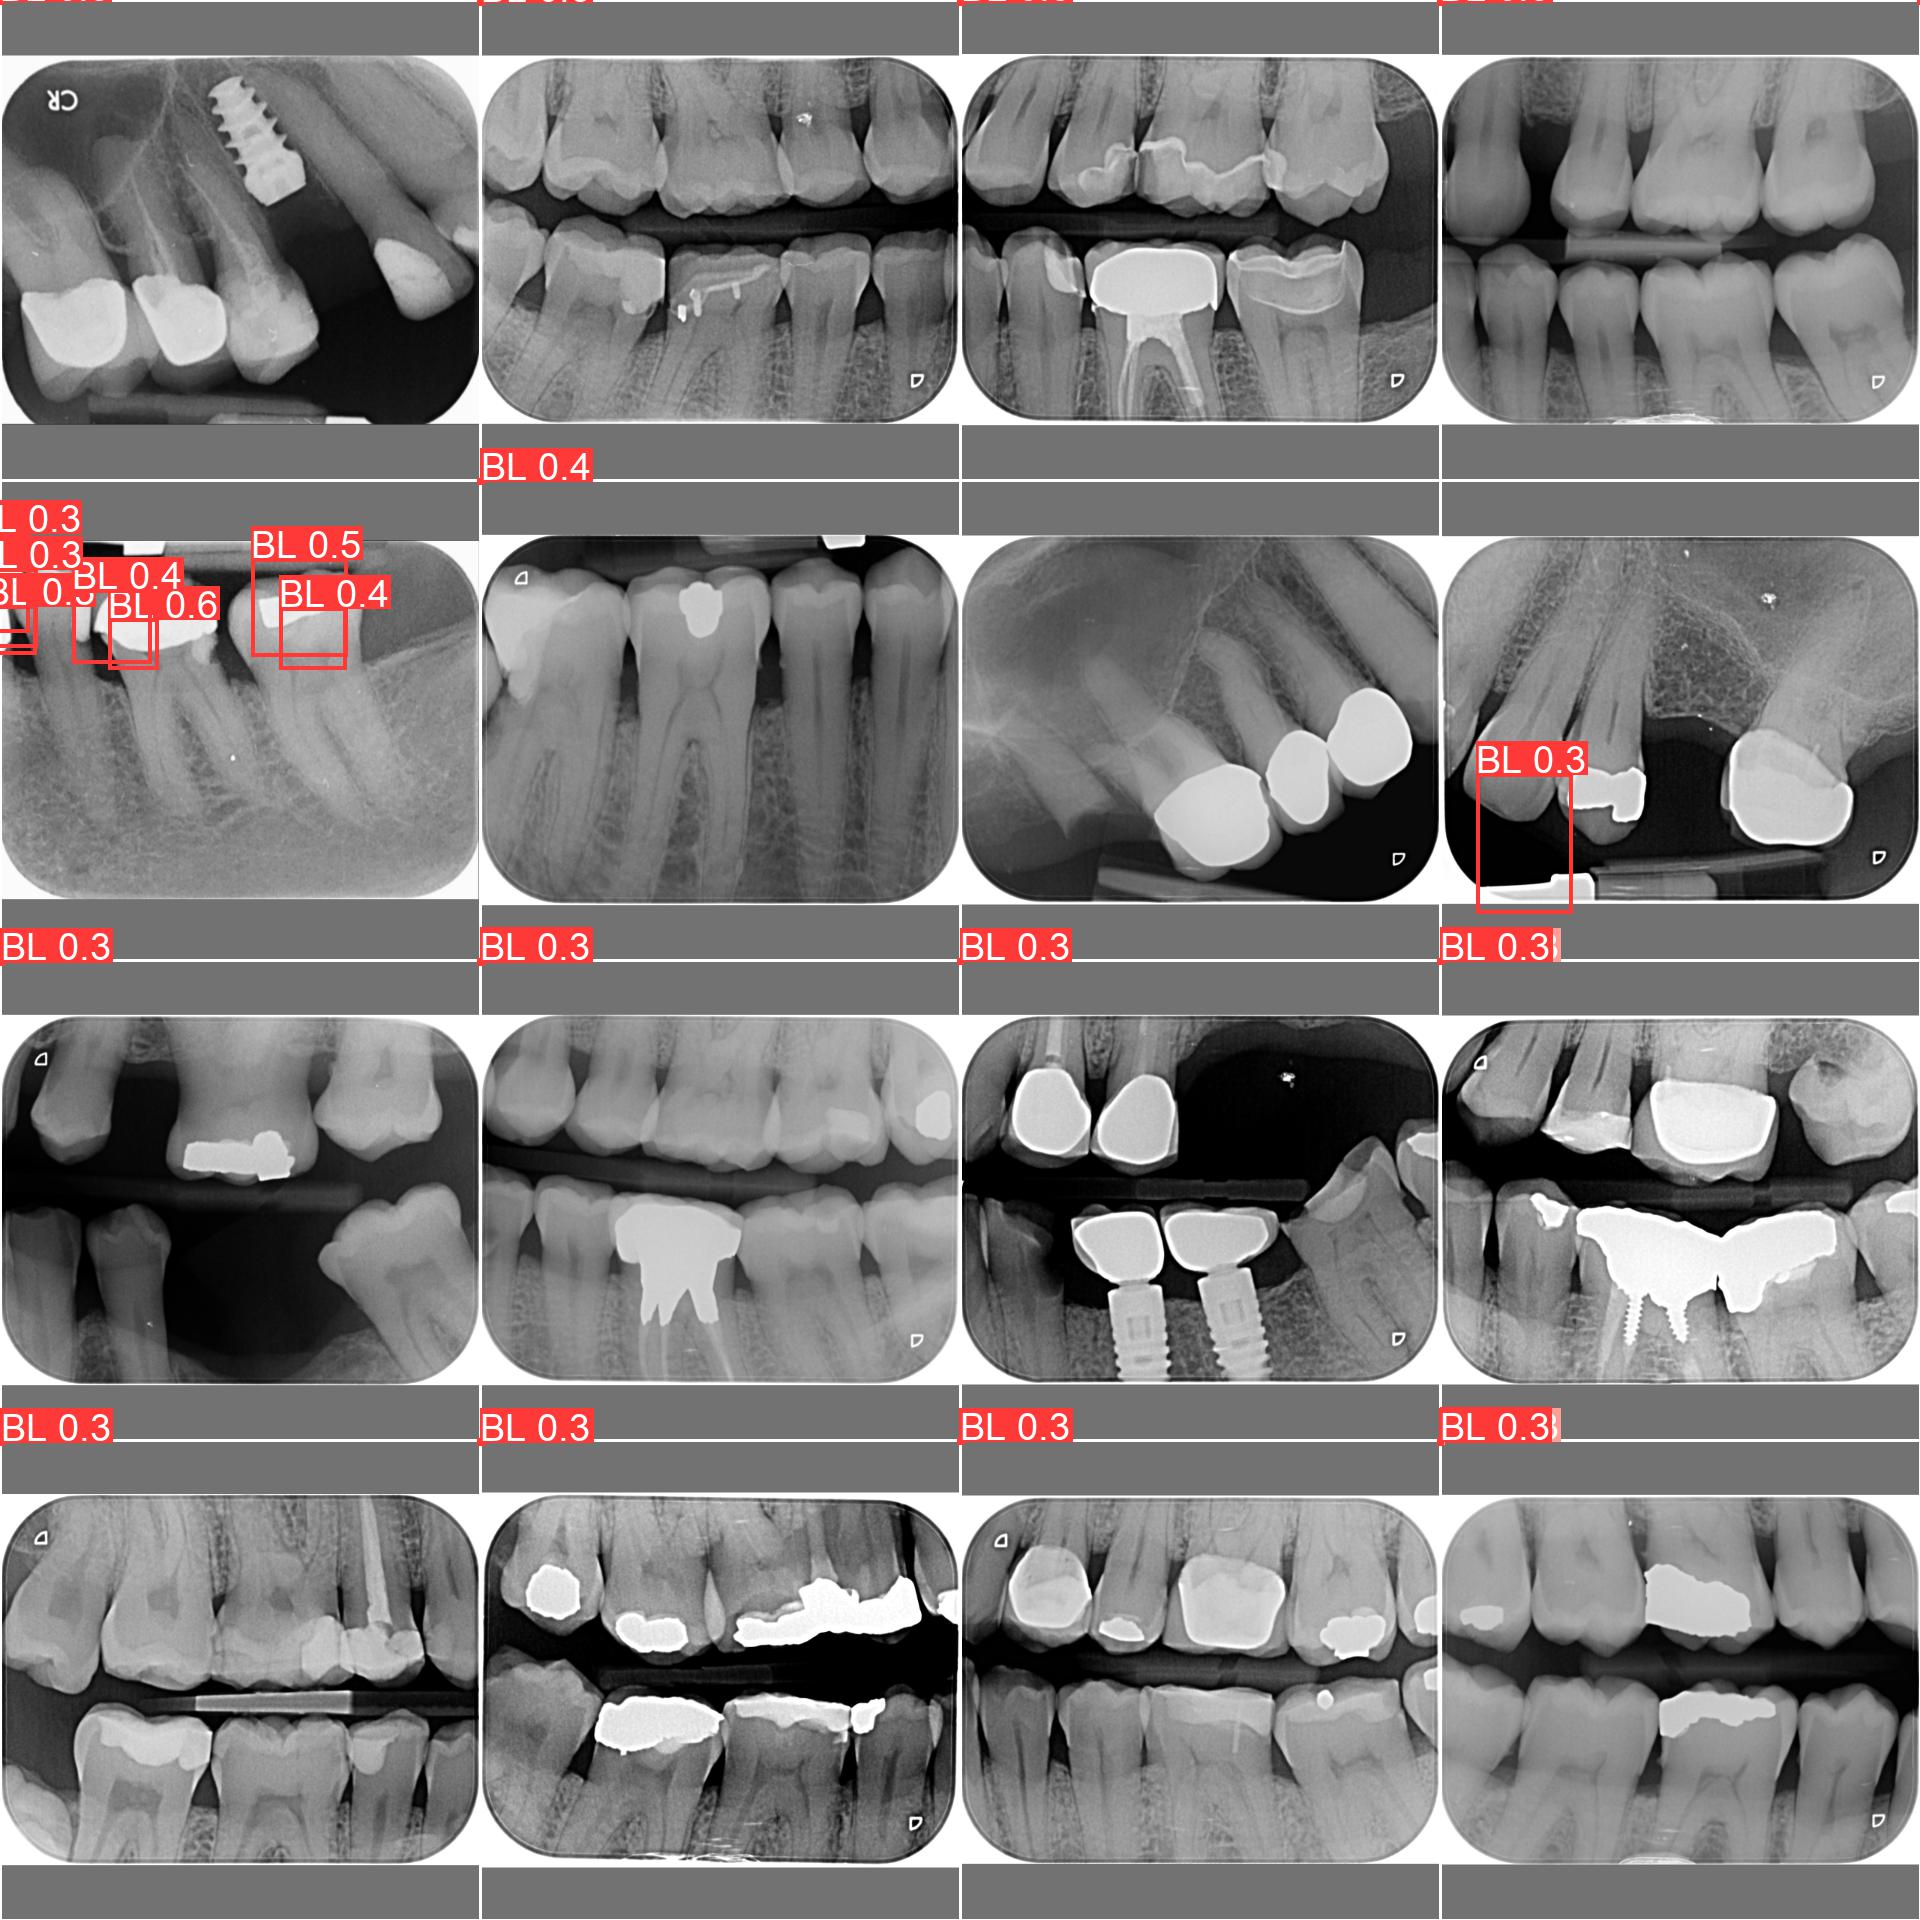

In [93]:
num_cl = 2
num_vol = 4
class_name = {0: 'BL', 1: 'DC'}

plot_images(imgs, img_info_map['cyolo_labels'], names = ['BL', 'DC'])
pil_img = Image(filename='images.jpg')
display(pil_img)

In [163]:
cyolo_results = read_exp_results(experiments['CYOLO-ptb150-300'][-1])
cyolo_results, cyolo_hyp, cyolo_opt, cyolo_pred = [cyolo_results[x] for x in ['results', 'hyp', 'opt', 'pred']]

In [164]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

cyolo_results.columns = [x.strip() for x in cyolo_results.columns]
cyolo_results['train_loss'] = cyolo_results[['train/box_loss', 'train/cls_loss', 'train/cls_loss']].sum(axis=1)
cyolo_results['val_loss'] = cyolo_results[['val/box_loss', 'val/cls_loss', 'val/cls_loss']].sum(axis=1)

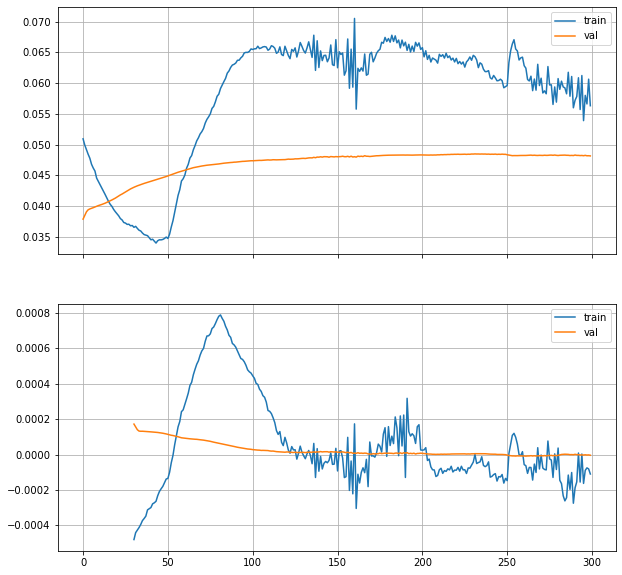

In [165]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
ax = axs[0]
ax.plot(cyolo_results['epoch'], cyolo_results['train_loss'], label='train')
ax.plot(cyolo_results['epoch'], cyolo_results['val_loss'], label='val')
ax.grid()
ax.legend()

ax = axs[1]
ax.plot(cyolo_results['epoch'], cyolo_results['train_loss'].diff().rolling(30).mean(), label='train')
ax.plot(cyolo_results['epoch'], cyolo_results['val_loss'].diff().rolling(30).mean(), label='val')
ax.grid()
# ax.set_ylim(-5e-5, 5e-5)
ax.legend()

In [160]:
print(df_exp191.columns[0])

NameError: name 'df_exp191' is not defined

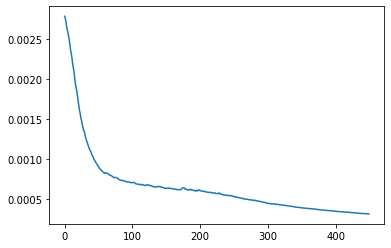

In [62]:
plt.plot(df_exp191[df_exp191.columns[0]], df_exp191[df_exp191.columns[3]])

<Figure size 36000x10800 with 0 Axes>

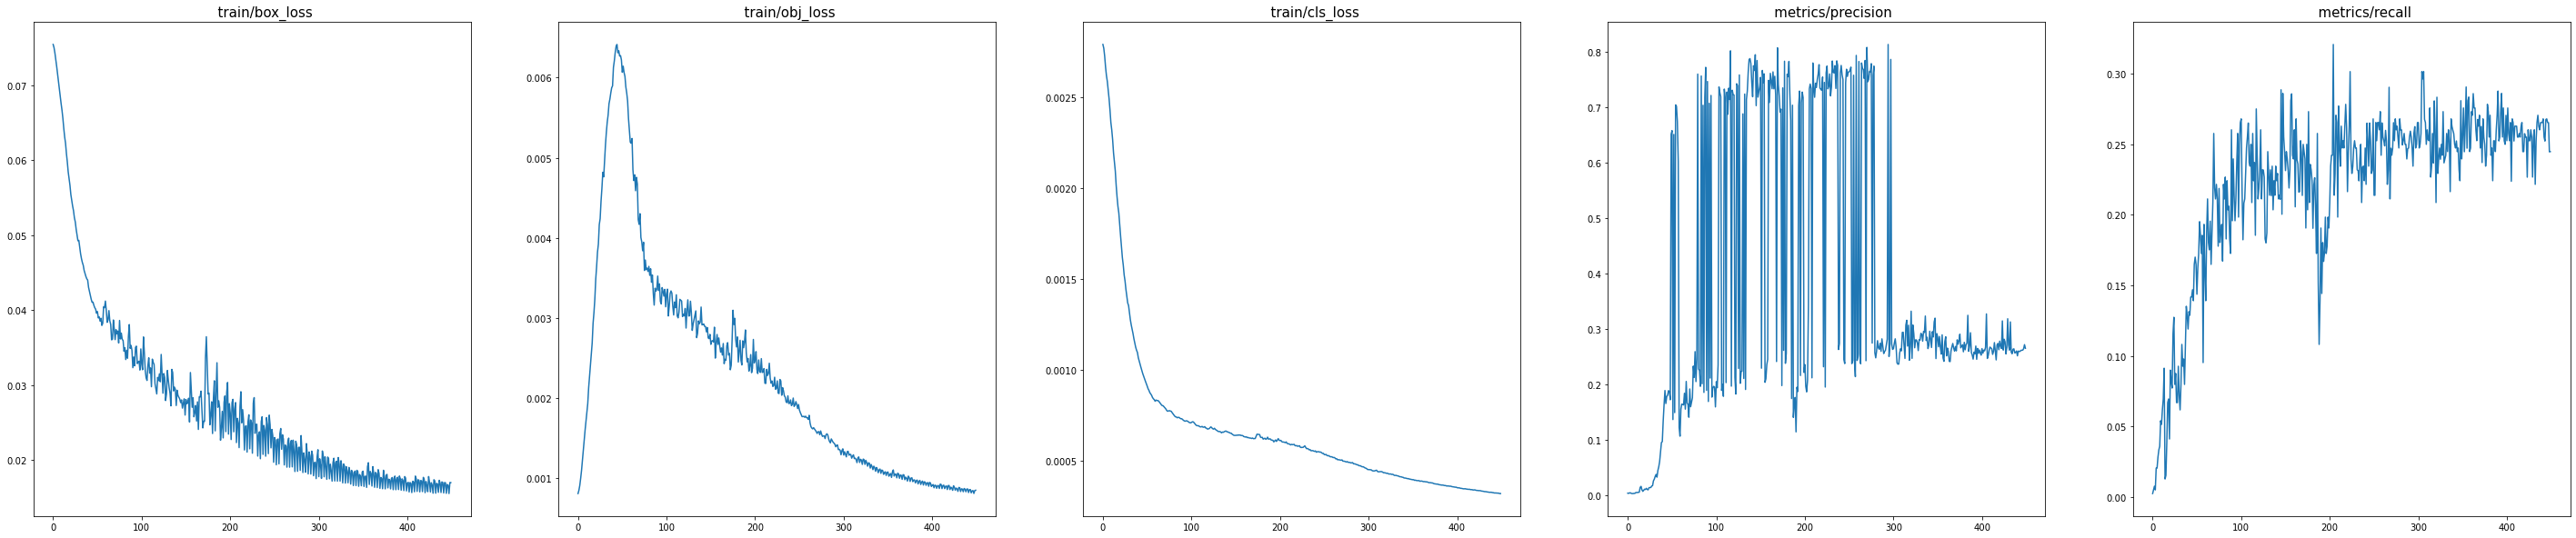

In [75]:
plt.figure(figsize=(500,150))
figure, axis = plt.subplots(1, 5, figsize = (50,10))
for i in range(5):
    axis[i].plot(df_exp191[df_exp191.columns[0]], df_exp191[df_exp191.columns[i+1]])
    axis[i].set_title(df_exp191.columns[i+1], fontsize = 15)
    


In [26]:
df_exp191.iloc[:,0]

0        0
1        1
2        2
3        3
4        4
      ... 
445    445
446    446
447    447
448    448
449    449
Name:                epoch, Length: 450, dtype: int64

In [ ]:
plt.figure(figsize=(600,600))

figure, axis = plt.subplots(2, 5, figsize = (20,10))

axis[0, 0].plot(df_exp102['               epoch'], df_exp102['      train/box_loss'], color='r', label='YOLO w/0 finetune')
axis[0, 0].plot(df_exp112['               epoch'], df_exp112['      train/box_loss'], color='g', label='YOLO w/ finetune')
axis[0, 0].set_title("train/box_loss", fontsize = 15)

plt.legend(bbox_to_anchor=(1.5, 1.5), loc='upper left')
figure.suptitle('YOLO baseline models comparsion', fontsize = 20)

plt.legend(prop={"size":12})
plt.show()